In [1]:
#calcular parâmetros das galáxias
#EM CONSTRUÇÃO!
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from astropy.visualization import LogStretch
from matplotlib.colors import LogNorm
from astropy.modeling import models
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import photutils
import time
import statmorph
%matplotlib inline

log_stretch = LogStretch(a=10000.0)

def normalize(image):
    m, M = np.min(image), np.max(image)
    return (image-m) / (M-m)

Filename: teste455.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (221, 221)   float32   


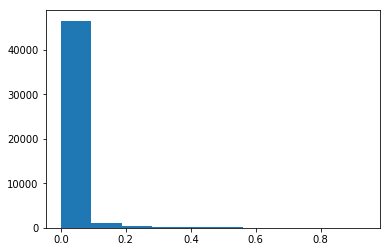

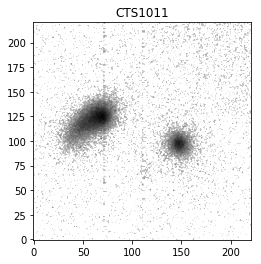

In [2]:
GHII = 'teste455.fits'
image_star = 'teste455_psf.fits'

filename = get_pkg_data_filename(GHII)
fits.info(filename)

hdu = fits.open(filename)
#hdu.writeto( 'newtable.fits' )
image_data = hdu[0].data

NBINS = 10
histogram = plt.hist(image_data.flatten(), NBINS)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('CTS1011')
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=0.025, vmax=1))

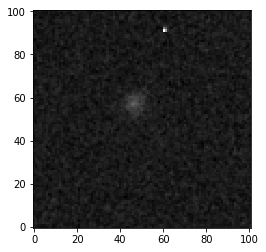

In [3]:
#Estrela PSF
psf = fits.open(image_star)
psf = psf[0].data
plt.imshow(psf, origin='lower', cmap='gray')

In [4]:
#convolução
image_data = ndi.convolve(image_data,psf,origin=[120,107])
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=0.025, vmax=1))

ValueError: Invalid origin; origin must satisfy -(weights.shape[k] // 2) <= origin[k] <= (weights.shape[k]-1) // 2

In [5]:
threshold = photutils.detect_threshold(image_data, snr=1.5)
npixels = 1000  # minimum number of connected pixels
segm = photutils.detect_sources(image_data, threshold, npixels)

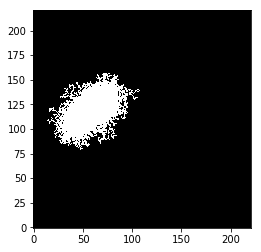

In [6]:
# Keep only the largest segment
label = np.argmax(segm.areas) + 1
segmap = segm.data == label
plt.imshow(segmap, origin='lower', cmap='gray')

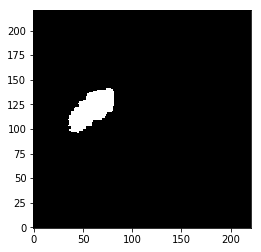

In [7]:
segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
segmap = segmap_float > 0.99
plt.imshow(segmap, origin='lower', cmap='gray')

In [8]:
#Agora que temos todos os dados necessários
gain=1000.0
start = time.time()
source_morphs = statmorph.source_morphology(image_data, segmap, gain=gain, psf=psf, eta=0.2)
print('Time: %g s.' % (time.time() - start))

Finished processing source 1.

Time: 2.42189 s.


In [9]:
morph = source_morphs[0]
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r50 =', morph.r50)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)
print('r50 em arcseg =',morph.r50*0.161)
print('Retorna o eixo semi-principal da elipse mínima =',morph.rmax_ellip)
print('O eixo semi-principal de uma abertura elíptica contendo 50% da luz =',morph.rhalf_ellip) 

xc_centroid = 61.00211017292584
yc_centroid = 121.19250611735012
ellipticity_centroid = 0.5196785135232188
elongation_centroid = 2.0819389266449986
orientation_centroid = 0.6524366830984415
xc_asymmetry = 61.747287470825185
yc_asymmetry = 121.81144792104206
ellipticity_asymmetry = 0.5211126206556571
elongation_asymmetry = 2.088173635665918
orientation_asymmetry = 0.652753881973122
rpetro_circ = 34.46634425371611
rpetro_ellip = 43.894491768713074
rhalf_circ = 14.598497845359274
rhalf_ellip = 19.410146864796236
r20 = 8.086341911016236
r50 = 14.727609298590332
r80 = 25.75618478165004
Gini = 0.50173648190478
M20 = -1.2641165431346486
F(G, M20) = -0.600371650179027
S(G, M20) = -0.005993082409983919
sn_per_pixel = 4.675546
C = 2.5156471585884543
A = 0.10635408398579319
S = -0.08281954729358329
sersic_amplitude = 0.09921106609706448
sersic_rhalf = 54.14717553361424
sersic_n = 4.610381642442412
sersic_xc = 91.99879960196029
sersic_yc = 84.00456944171292
sersic_ellip = -0.7936744631922397
sersi

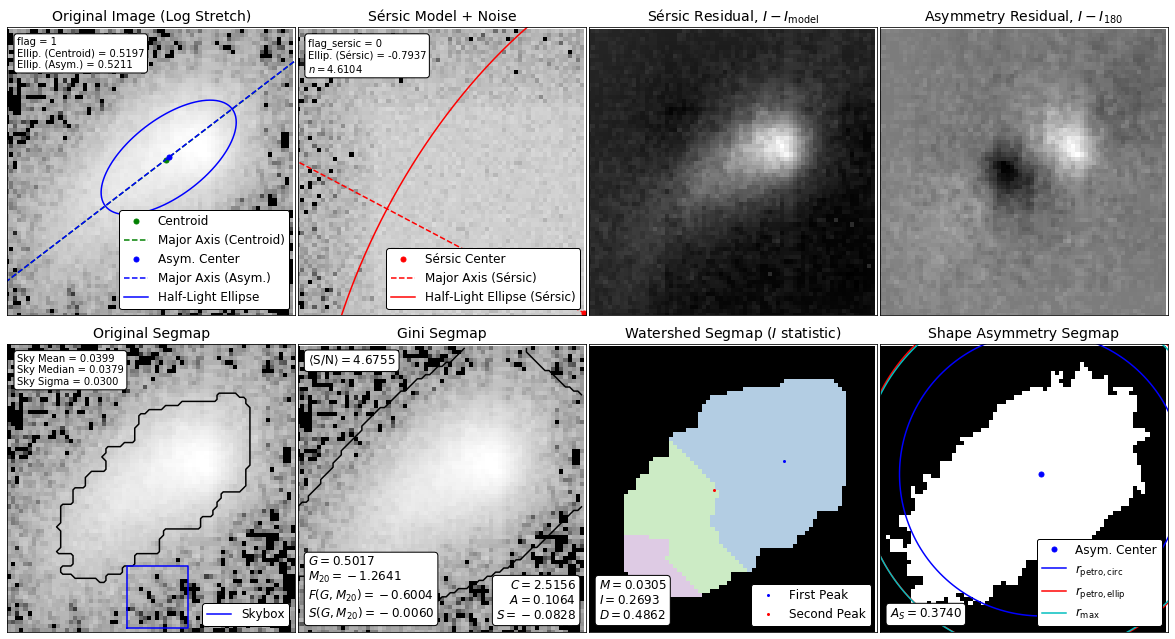

In [10]:
from statmorph.utils.image_diagnostics import make_figure
fig = make_figure(morph)
fig.savefig(GHII+'_morph.png', dpi=150)